In [1]:
import pandas as pd
import numpy as np
import pyranges
from gtfparse import read_gtf
import matplotlib.pyplot as plt
import colorsys

In [2]:
#read all files
df_nongenes = pd.read_csv("/home/dbeb/btech/bb1160039/scratch/project/rmmulti/Human PBMC/counts_non_genes_pbmc_10k_rmmulti.csv", index_col=0)
df_gtf = read_gtf("/home/dbeb/btech/bb1160039/scratch/project/gencode.v34.annotation.gtf")

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'hgnc_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'protein_id', 'ccdsid']


In [3]:
#creating pyranges object for non-genes
l_se_name = []
l_se_chr = []
l_se_start = []
l_se_end = []
for x in df_nongenes.index:
    l_se_name.append(x)
    l_se_chr.append("chr"+x.split("-")[1])
    l_se_start.append(x.split("-")[2])
    l_se_end.append(str(int(x.split("-")[2])+int(x.split("-")[3])))
    
dict_ngenes= {"Chromosome":l_se_chr,"Start": l_se_start,"End": l_se_end,"Name":l_se_name}
py_ng=pyranges.from_dict(dict_ngenes)
py_ng

+--------------+-----------+-----------+---------------------+
| Chromosome   | Start     | End       | Name                |
| (category)   | (int32)   | (int32)   | (object)            |
|--------------+-----------+-----------+---------------------|
| chr1         | 100002996 | 100003087 | gene-1-100002996-91 |
| chr1         | 100003052 | 100003143 | gene-1-100003052-91 |
| chr1         | 100003105 | 100003196 | gene-1-100003105-91 |
| chr1         | 100003156 | 100003247 | gene-1-100003156-91 |
| ...          | ...       | ...       | ...                 |
| chrY         | 5793241   | 5793317   | gene-Y-5793241-76   |
| chrY         | 5793241   | 5793318   | gene-Y-5793241-77   |
| chrY         | 5793241   | 5793319   | gene-Y-5793241-78   |
| chrY         | 5793241   | 5793320   | gene-Y-5793241-79   |
+--------------+-----------+-----------+---------------------+
Unstranded PyRanges object has 472,895 rows and 4 columns from 24 chromosomes.
For printing, the PyRanges was sorted o

In [4]:
#creating pyranges object for genes
df_genes = df_gtf[df_gtf["feature"] == "gene"]

In [5]:
gene_type=df_genes.gene_type.value_counts().index
interval = [0,10,20,50,100,500,1000,5000,10000,50000,100000]
overlaps_forward=[]
overlaps_back=[]
for gtype in gene_type:
    df_type = df_genes[df_genes.gene_type==gtype]
    for i in interval:
        dict_type_forward ={"Chromosome":df_type.seqname,"Start":df_type.start,"End":df_type.end+i}
        py_gg_forward = pyranges.from_dict(dict_type_forward)
        overlap_forward=py_ng.count_overlaps(py_gg_forward).as_df()
        overlaps_forward.append([str(gtype+"-"+str(i)),len(list(overlap_forward[overlap_forward.NumberOverlaps>0].Name))])
        dict_type_back ={"Chromosome":df_type.seqname,"Start":df_type.start-i,"End":df_type.end}
        py_gg_back = pyranges.from_dict(dict_type_back)
        overlap_back=py_ng.count_overlaps(py_gg_back).as_df()
        overlaps_back.append([str(gtype+"-"+str(i)),len(list(overlap_back[overlap_back.NumberOverlaps>0].Name))])

INFO:numexpr.utils:Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [6]:
ae = [element * len(interval) for element in list(range(0,len(gene_type)))]
x_ax_for=[]
y_ax_for=[]
x_ax_back=[]
y_ax_back=[]
n_ax=[]
for a in ae:
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for i in range(a,a+11):
        x1.append(-int(overlaps_back[i][0].split("-")[1]))
        y1.append(int(overlaps_back[i][1]))
        x2.append(int(overlaps_forward[i][0].split("-")[1]))
        y2.append(int(overlaps_forward[i][1]))
    x_ax_for.append(x1)
    y_ax_for.append(y1)
    x_ax_back.append(x2)
    y_ax_back.append(y2)
    n_ax.append(overlaps_back[a][0].split("-")[0])

In [10]:
N = len(n_ax)
HSV_tuples = [(x*1.0/10, 0.8, 0.8) for x in range(N)]
RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))

In [11]:
gene_type

Index(['protein_coding', 'lncRNA', 'processed_pseudogene',
       'unprocessed_pseudogene', 'misc_RNA', 'snRNA', 'miRNA', 'TEC', 'snoRNA',
       'transcribed_unprocessed_pseudogene', 'rRNA_pseudogene',
       'transcribed_processed_pseudogene', 'IG_V_pseudogene', 'IG_V_gene',
       'transcribed_unitary_pseudogene', 'TR_V_gene', 'unitary_pseudogene',
       'TR_J_gene', 'rRNA', 'scaRNA', 'polymorphic_pseudogene', 'IG_D_gene',
       'TR_V_pseudogene', 'Mt_tRNA', 'IG_J_gene', 'pseudogene', 'IG_C_gene',
       'IG_C_pseudogene', 'ribozyme', 'TR_C_gene', 'sRNA', 'TR_J_pseudogene',
       'TR_D_gene', 'IG_J_pseudogene', 'Mt_rRNA',
       'translated_processed_pseudogene', 'IG_pseudogene', 'scRNA', 'vaultRNA',
       'translated_unprocessed_pseudogene'],
      dtype='object')

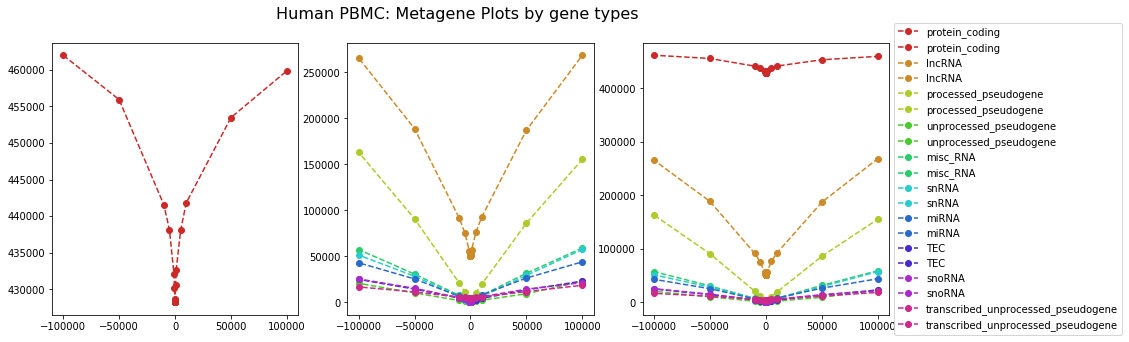

In [17]:
fig, axs = plt.subplots(1,3,figsize = (15, 5))
axs[0].plot(x_ax_for[0],y_ax_for[0],label=n_ax[0],linestyle='--', marker='o', color=RGB_tuples[0])
axs[0].plot(x_ax_back[0],y_ax_back[0],label=n_ax[0],linestyle='--', marker='o', color=RGB_tuples[0])
for i in range(1,10):
    axs[1].plot(x_ax_for[i],y_ax_for[i],label=n_ax[i],linestyle='--', marker='o', color=RGB_tuples[i])
    axs[1].plot(x_ax_back[i],y_ax_back[i],label=n_ax[i],linestyle='--', marker='o', color=RGB_tuples[i])
for i in range(0,10):
    axs[2].plot(x_ax_for[i],y_ax_for[i],label=n_ax[i],linestyle='--', marker='o', color=RGB_tuples[i])
    axs[2].plot(x_ax_back[i],y_ax_back[i],label=n_ax[i],linestyle='--', marker='o', color=RGB_tuples[i])
axs[2].legend(loc='center left', bbox_to_anchor=(1,0.5))
fig.suptitle('Human PBMC: Metagene Plots by gene types', fontsize=16);

In [7]:
# Check overlap intervals
dict_genes={"Chromosome":df_genes.seqname,"Start":df_genes.start,"End":df_genes.end}
py_gg = pyranges.from_dict(dict_genes)
py_gg
overlaps=py_ng.count_overlaps(py_gg).as_df()

In [97]:
chr1_coexp = list(overlaps[overlaps.NumberOverlaps>0].Name)

In [84]:
markers = pd.read_csv("marker_neurons.csv", header=None, names=["genes"])

In [99]:
com=set(chr1_coexp).intersection(markers.genes)

In [100]:
chrs=[]
for x in com:
    chrs.append(x.split("-")[1])

In [101]:
heights=list(pd.DataFrame(chrs, columns=["chr"]).chr.value_counts())
labels=pd.DataFrame(chrs, columns=["chr"]).chr.value_counts().index

<BarContainer object of 20 artists>

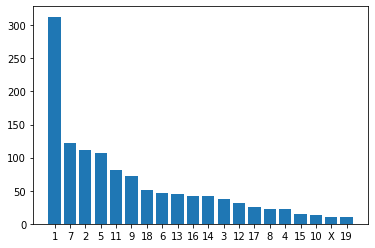

In [102]:
plt.bar(x=labels, height=heights)

In [103]:
len(chrs)

1223

In [ ]:
f=open('f1.txt','w')
for ele in l1:
    f.write(ele+'\n')